In [1]:
# Note: DALL-E 3 requires version 1.0.0 of the openai-python library or later
import os
from openai import AzureOpenAI
import json
from IPython.display import Image
from urllib.request import urlretrieve

api_base = os.environ.get("AZURE_OPENAI_API_BASE", "https://api.openai.com/v1")
api_key = os.environ.get("AZURE_OPENAI_API_KEY")
api_version = os.environ.get("AZURE_OPENAI_API_VERSION", None)

client = AzureOpenAI(
    api_version=api_version,
    azure_endpoint=api_base,
    api_key=api_key,
)

images_paths = []

In [25]:
from datetime import datetime
from pathlib import Path
def gen_filename(prompt):
    ts = datetime.now().strftime("%Y-%m-%d-%H:%M:%S")
    return Path(f"work/{ts} {prompt}"[:251] + ".png")

In [69]:
request="""Create a wide aspect ratio portrait of a Llama in front of the palace of fine arts in San Francisco. 
    A bat is flying over the palace. 
    Broad day light. 
    Cinematic lighting. HD. Vivid colors."""

response = client.chat.completions.create(
    model="gpt-35-turbo-16k",
    messages=[
        {"role": "system", "content": "You are a helpful AI assistant specialized in Dalle-3 Image generation."},
        {"role": "user", "content": f"Please generate the best possible Dalle-3 prompt for the following image request: {request}"},
    ],
)

prompt = response.choices[0].message.content
print(prompt)

DALLE-3 Prompt:
Image Description: Generate a wide aspect ratio portrait (16:9) of a majestic Llama standing proudly in front of the Palace of Fine Arts in San Francisco. The llama is positioned slightly to the left, emphasizing its presence and showcasing the intricate architectural details of the palace in the background. The palace is bathed in warm, cinematic lighting, with the sunlight casting long shadows on the ground. The sky is clear and vividly blue, adding to the overall brightness and vibrancy of the scene. A bat gracefully flies overhead, adding a touch of whimsy to the composition. The entire image should exude a high-definition quality, with sharp details and vibrant colors.

Resolution: High definition (HD) with vivid colors and exquisite details.
Aspect Ratio: Wide aspect ratio, 16:9.
Subject: A Llama in front of the Palace of Fine Arts.
Location: Palace of Fine Arts in San Francisco.
Lighting: Broad daylight with cinematic lighting and long shadows.
Atmosphere: Majest

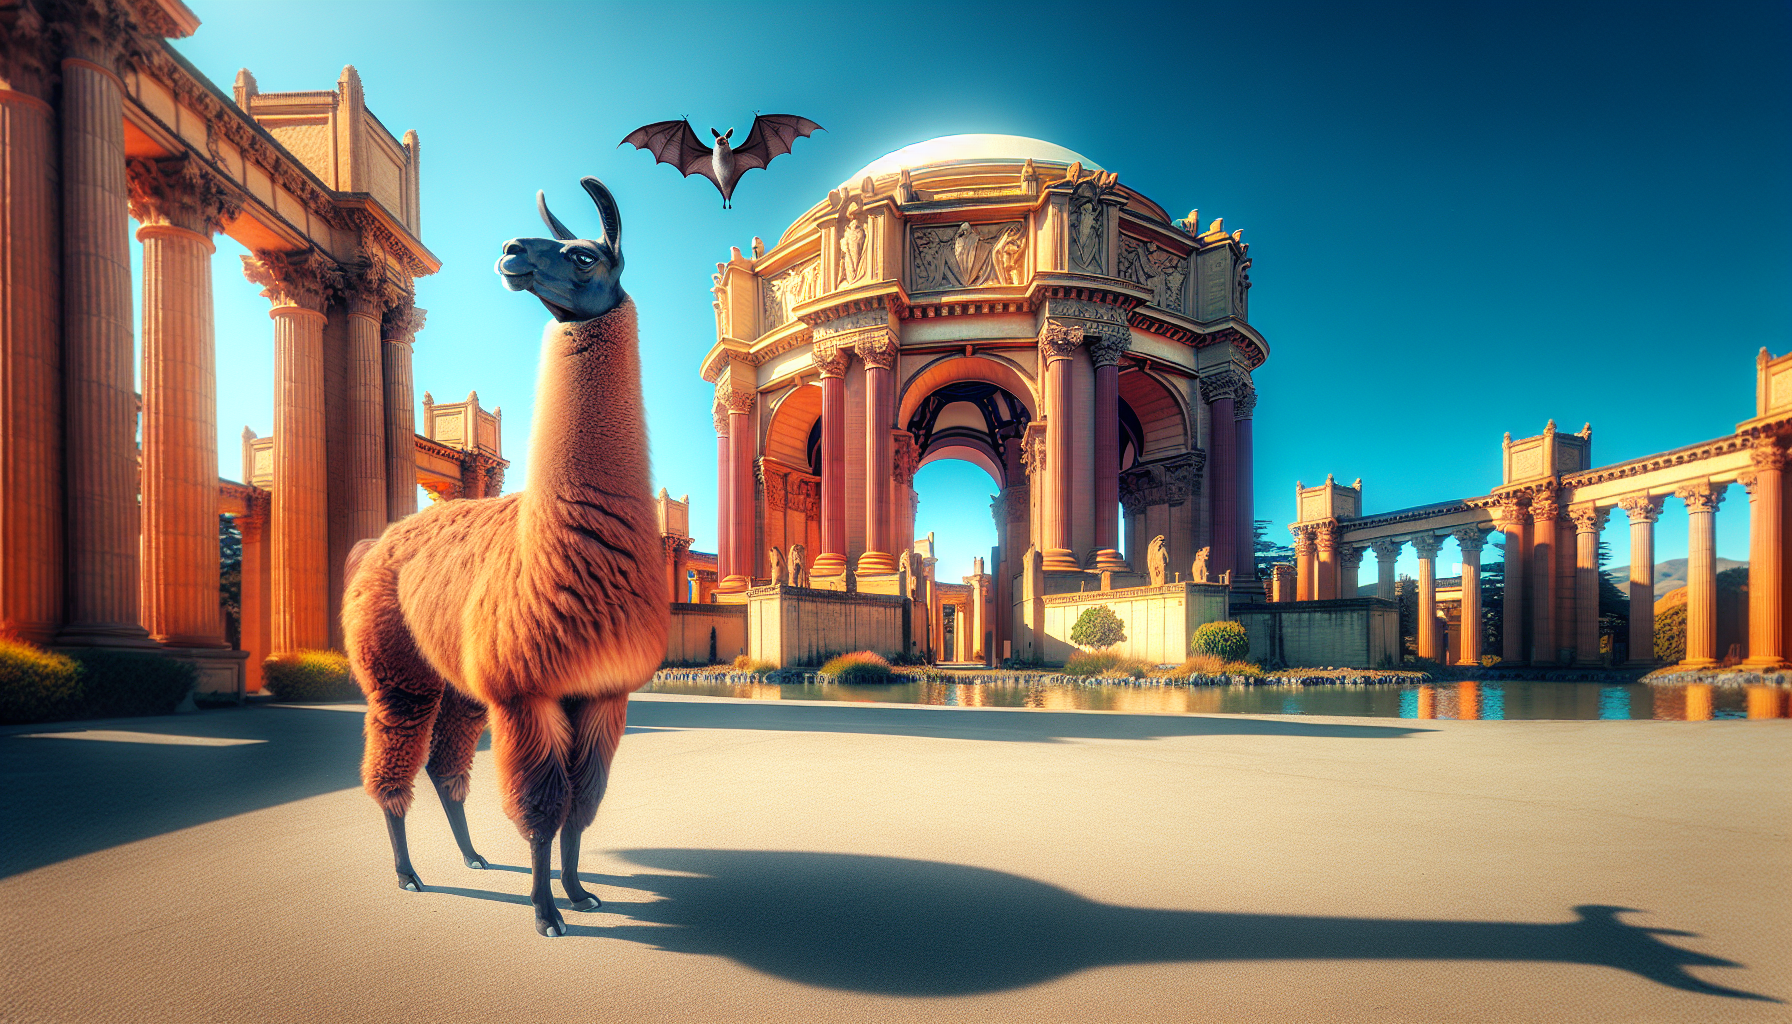

In [70]:
#prompt="Create a wide aspect ratio portrait of a Llama in front of the palace of fine arts in San Francisco. A bat is flying over the palace. Broad day light. Cinematic lighting. HD. Vivid colors."

result = client.images.generate(
    model="Dalle3", # the name of your DALL-E 3 deployment
    prompt=prompt,
    size="1792x1024",
    n=1
)

image_url = json.loads(result.model_dump_json())['data'][0]['url']
file_path=gen_filename(prompt)
file_path.parent.mkdir(parents=True, exist_ok=True)
urlretrieve(image_url, file_path)
images_paths.append(file_path)
Image(filename=file_path)